# Module D: Linear Algebra

### Concepts
* Elements of Linear Algebra
* Linear Regression
* Principal Component Analysis

In [258]:
import numpy as np
from scipy import linalg

## Linear Algebra and Systems of Linear Equations

1. Show that matrix multiplication distributes over matrix addition: show A(B+C)=AB+AC assuming that A,B, and C are matrices of compatible size.

In [27]:
# Generate three random matrices of size 3x3
_A_matrix = np.random.rand(3,3)
_B_matrix = np.random.rand(3,3)
_C_matrix = np.random.rand(3,3)

# Print the matrices
print("\nMatrix A:\n", _A_matrix)
print("\nMatrix B:\n", _B_matrix)
print("\nMatrix C:\n", _C_matrix)

# Multiply A by B and C
left_side = _A_matrix * (_B_matrix + _C_matrix)
right_side = _A_matrix * _B_matrix + _A_matrix * _A_matrix

# Print the results
print("\n\nComparing the left and right sides of the equation:")
print("\nA(B+C):\n", left_side)
print("\nAB + AC:\n", right_side)

print("\n\nThe left side and right side are equal:", np.allclose(left_side, right_side))


Matrix A:
 [[0.76901    0.38403519 0.93387282]
 [0.95349306 0.93922536 0.47492483]
 [0.33814865 0.02467582 0.45743158]]

Matrix B:
 [[0.95212269 0.28813057 0.74479767]
 [0.93052602 0.21444346 0.35132826]
 [0.6489105  0.49564888 0.22482452]]

Matrix C:
 [[0.60423793 0.82040795 0.03352426]
 [0.55790149 0.97207327 0.61152986]
 [0.19423259 0.85720262 0.56249779]]


Comparing the left and right sides of the equation:

A(B+C):
 [[1.19685688 0.42571781 0.7268537 ]
 [1.4192053  1.11440661 0.45728523]
 [0.2851077  0.03338272 0.36014609]]

AB + AC:
 [[1.32356826 0.25813531 1.56766476]
 [1.79639911 1.08355502 0.39240811]
 [0.33377271 0.01283944 0.31208549]]


The left side and right side are equal: False


2. Write a function my_is_orthogonal(v1,v2, tol), where v1 and v2 are column vectors of the same size and tol is a scalar value strictly larger than 0. The output should be 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise. You may assume that v1 and v2 are column vectors of the same size, and that tol is a positive scalar.

In [28]:
def my_is_orthogonal(v1: np.array,
                     v2: np.array,
                     tol: float) -> int:
    """
    Function to check if two vectors are orthogonal
    :param v1: Column vector v1
    :param v2: Column vector v2
    :param tol: Tolerance value
    :return: 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise
    """

    # Initialize the angle
    angle = 0

    # Calculate the angle
    for i in range(len(v1)):
        angle += v1[i] * v2[i]

    # Check if angle is a matrix
    if not np.isscalar(angle):
        angle = angle[0]

    # Check if the angle is within the tolerance
    if abs(angle) < tol:
        return 1
    else:
        return 0

In [29]:
# Test cases for problem 2
_a_test = np.array([[1], [0.001]])
_b_test = np.array([[0.001], [1]])

# output: 1
print("\nTest 1.1")
print("Expected output: 1")
print("Actual output:   ", my_is_orthogonal(_a_test,_b_test, 0.01))

# output: 0
print("\nTest 1.2")
print("Expected output: 0")
print("Actual output:   ", my_is_orthogonal(_a_test,_b_test, 0.001))


# output: 0
_a_test = np.array([[1], [0.001]])
_b_test = np.array([[1], [1]])
print("\nTest 2")
print("Expected output: 0")
print("Actual output:   ", my_is_orthogonal(_a_test,_b_test, 0.01))

# output: 1
_a_test = np.array([[1], [1]])
_b_test = np.array([[-1], [1]])
print("\nTest 2")
print("Expected output: 1")
print("Actual output:   ", my_is_orthogonal(_a_test,_b_test, 1e-10))


Test 1.1
Expected output: 1
Actual output:    1

Test 1.2
Expected output: 0
Actual output:    0

Test 2
Expected output: 0
Actual output:    0

Test 2
Expected output: 1
Actual output:    1


3. Write a function my_is_similar(s1,s2,tol) where s1 and s2 are strings, not necessarily the same size, and tol is a scalar value strictly larger than 0. From s1 and s2, the function should construct two vectors, v1 and v2, where v1[0] is the number of ‘a’s in s1, v1[1] is the number ‘b’s in s1, and so on until v1[25], which is the number of ‘z’s in v1. The vector v2 should be similarly constructed from s2. The output should be 1 if the absolute value of the angle between v1 and v2 is less than tol; that is, |θ|<tol.

In [30]:
def my_is_similar(s1: str,
                  s2: str,
                  tol: float) -> int:
    """
    Function to check if two strings are similar
    :param s1: String s1
    :param s2: String s2
    :param tol: Tolerance value
    :return: 1 if the angle between v1 and v2 is within tol of π/2; that is, |π/2−θ|<tol, and 0 otherwise
    """

    # Construct v1 and v2
    # They consist of the number of each alphabet in s1 and s2

    # Initialize the vectors
    v1 = np.zeros(26)
    v2 = np.zeros(26)


    # Count the number of each alphabet in s1 and s2
    for i in range(len(s1)):
        v1[ord(s1[i]) - 97] += 1

    for i in range(len(s2)):
        v2[ord(s2[i]) - 97] += 1


    # Check orthogonality with function my_is_orthogonal
    return my_is_orthogonal(v1,v2, tol)

In [43]:
# Test cases for problem 3
_s1_test = "abcd"
_s2_test = "abcd"
print("\nTest 1")
print("Expected output: 0")
print("Actual output:   ", my_is_similar(_s1_test,_s2_test, 0.01))

_s1_test = "abcdefghijklmnopqrstuvwxyz"
_s2_test = "zyxwvutsrqponmlkjihgfedcba"
print("\nTest 2")
print("Expected output: 0")
print("Actual output:   ", my_is_similar(_s1_test,_s2_test, 0.01))


Test 1
Expected output: 0
Actual output:    0

Test 2
Expected output: 0
Actual output:    0


4. Write a function my_make_lin_ind(A), where A and B are matrices. Let the rank(A)=n. Then B should be a matrix containing the first n columns of A that are all linearly independent. Note that this implies that B is full rank.

In [187]:
def my_make_lin_ind(A: np.array) -> np.array:
    """
    Function to make matrix A linearly independent
    :param A: Matrix A
    :return: Matrix B, containing the first n columns of A that are all linearly independent
    """

    # Initialize matrix B to first column of A
    B = A[:,0]

    # Construct B
    _rank = 1
    for i in range(1, A.shape[1]):
        _col = A[:,i]

        # Add next column of A to _B
        _B = np.column_stack((B, _col))

        # Check if the rank of _B is equal to the rank of A
        if np.linalg.matrix_rank(_B) > _rank:
            B = _B
            _rank += 1

    return B

In [188]:
## Test cases for problem 4

_A_matrix = np.array([[12,24,0,11,-24,18,15],
                      [19,38,0,10,-31,25,9],
                      [1,2,0,21,-5,3,20],
                      [6,12,0,13,-10,8,5],
                      [22,44,0,2,-12,17,23]])

_B_matrix = my_make_lin_ind(_A_matrix)

# print the output
print("Expected:")
print(np.array([
    [12,11,-24,15],
    [19,10,-31,9],
    [1,21,-5,20],
    [6,13,-10,5],
    [22,2,-12,23]]))

print("\nActual:")
print(_B_matrix)

Expected:
[[ 12  11 -24  15]
 [ 19  10 -31   9]
 [  1  21  -5  20]
 [  6  13 -10   5]
 [ 22   2 -12  23]]

Actual:
[[ 12  11 -24  15]
 [ 19  10 -31   9]
 [  1  21  -5  20]
 [  6  13 -10   5]
 [ 22   2 -12  23]]


In [200]:
def my_rec_det(M: np.array) -> float:
    """
    Function to compute the determinant of a matrix
    :param M: Matrix M
    :return: Determinant of matrix M
    """

    def my_min_det(m: np.array) -> float:
        """
        Function to compute the determinant of a minor matrix m using Cramer’s rule
        :param m: minor matrix m of size 2 x 2
        :return: Determinant of minor matrix
        """

        return m[0,0]*m[1,1] - m[0,1]*m[1,0]


    def my_det(m: np.array) -> float:
        """
        Recursive function to compute the determinant of a matrix M
        :param m:
        :return:
        """

        if m.shape == (2, 2):
            return my_min_det(m)

        else:
            _det = 0
            for i in range(m.shape[1]):
                # Construct minor matrix
                _m = m[1:]
                _m = np.delete(_m, i, axis = 1)

                # Add the determinant of the minor matrix to _det
                _det += (-1)**i * m[0,i] * my_det(_m)
            return _det


    return my_det(M)

In [201]:
print("\nTest 1: 3x3")
_A_matrix = np.random.rand(3,3)

print("Expected:")
print(np.linalg.det(_A_matrix))

print("Actual:")
print(my_rec_det(_A_matrix))


print("\nTest 2: 4x4")
_B_matrix = np.random.rand(4,4)

print("Expected:")
print(np.linalg.det(_B_matrix))

print("Actual:")
print(my_rec_det(_B_matrix))


print("\nTest 3: 5x5")
_C_matrix = np.random.rand(5,5)

print("Expected:")
print(np.linalg.det(_C_matrix))

print("Actual:")
print(my_rec_det(_C_matrix))


Test 1: 3x3
Expected:
0.017213721498537282
Actual:
0.017213721498537286

Test 2: 4x4
Expected:
0.0075536841374955095
Actual:
0.007553684137495505

Test 3: 5x5
Expected:
-0.15099420057021268
Actual:
-0.15099420057021268


6. What is the complexity of my_rec_det in the previous problem? Do you think this is an effective way of determining if a matrix is singular or not?

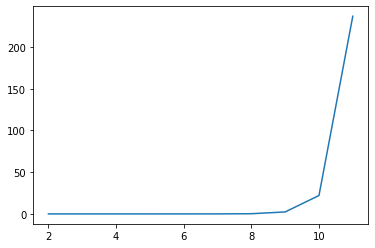

In [203]:
# Checking complexity of my_rec_det for 2x2 to 12x12 matrices
import time
from matplotlib import pyplot as plt

times = np.array([])
test_range = range(2, 12)

for m_size in test_range:
    _A_matrix = np.random.rand(m_size, m_size)

    start = time.time()
    my_rec_det(_A_matrix)
    end = time.time()

    times = np.append(times, end-start)

fig = plt.plot(test_range, times)

Looking at the time complexity of finding the determinant of an n x n matrix from n=2 to n=12, we can see that the time complexity is $O(n^3)$. This is because the time complexity of my_rec_det and Cramer's rule is $O(n^3)$.

6. Let p be a vector with length L containing the coefficients of a polynomial of order L−1. For example, the vector p=[1,0,2] is a representation of the polynomial f(x)=1x2+0x+2. Write a function my_poly_der_mat(p), where p is the aforementioned vector, and the output D is the matrix that will return the coefficients of the derivative of p when p is left multiplied by D. For example, the derivative of f(x) is f′(x)=2x, and therefore, d=Dp should yield d=[2,0]. Note this implies that the dimension of D is L−1×L. The point of this problem is to show that integrating polynomials is actually a linear transformation.

In [207]:
def my_poly_der_mat(p: np.array):
    """
    Function to compute the derivative of a polynomial p
    :param p: Vector p containing the coefficients of a polynomial
    :return: Vector d containing the coefficients of the derivative of p
    """

    # Initialize output matrix d
    d = np.zeros(len(p)-1)

    # Reverse p
    p = p[::-1]

    # Compute the derivative of p
    for i in range(1, len(p)):
        d[i-1] = p[i] * i

    # Reverse d and return
    return d[::-1]

In [213]:
# Test 1: p = [1,0,2]
print("\nTest 1: p = [1,0,2]")
print("Expected:", [2,0])
print("Actual:", my_poly_der_mat([1,0,2]))

# Test 2: p = [1, 2, 3, 4]
print("\nTest 2: p = [1, 2, 3, 4]")
print("Expected:", [3, 4, 3])
print("Actual:", my_poly_der_mat([1, 2, 3, 4]))

# Test 3: p = [99, 534, 2345, 5467, 23456]
print("\nTest 3: p = [99, 534, 2345, 5467, 23456]")
print("Expected:", [396, 1602, 4690, 5467])
print("Actual:", my_poly_der_mat([99, 534, 2345, 5467, 23456]))


Test 1: p = [1,0,2]
Expected: [2, 0]
Actual: [2. 0.]

Test 2: p = [1, 2, 3, 4]
Expected: [3, 4, 3]
Actual: [3. 4. 3.]

Test 3: p = [99, 534, 2345, 5467, 23456]
Expected: [396, 1602, 4690, 5467]
Actual: [ 396. 1602. 4690. 5467.]


7. Consider the following network consisting of two power supply stations denoted by S1 and S2 and five power recipient nodes denoted by N1 to N5. The nodes are connected by power lines, which are denoted by arrows, and power can flow between nodes along these lines in both directions.
Let di be a positive scalar denoting the power demands for node i, and assume that this demand must be met exactly. The capacity of the power supply stations is denoted by S. Power supply stations must run at their capacity. For each arrow, let fj be the power flow along that arrow. Negative flow implies that power is running in the opposite direction of the arrow.
Write a function my_flow_calculator(S, d), where S is a 1×2 vector representing the capacity of each power supply station, and d is a 1×5 row vector representing the demands at each node (i.e., d[0] is the demand at node 1). The output argument, f, should be a 1×7 row vector denoting the flows in the network (i.e., f[0]=f1 in the diagram). The flows contained in f should satisfy all constraints of the system, like power generation and demands. Note that there may be more than one solution to the system of equations.
The total flow into a node must equal the total flow out of the node plus the demand; that is, for each node i,finflow=foutflow+di. You may assume that ΣSj=Σdi.

In [275]:
def my_flow_calculator(S: np.array, d: np.array):
    """
    Function to compute the flows in a network
    :param S: Vector S containing the capacity of each power supply station
    :param d: Vector d containing the demands at each node
    :return: Vector f containing the flows in the network
    """

    # Initialize i matrix based on given flow chart
    i = np.array([
        [0, 0, -1, 1, 0, -1, 0],
        [0, 0, 0, 0, 1, 0, -1],
        [0, 1, 0, 0, 0, 0, 0],
        [1, -1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1],
        [1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0]
    ])

    # Create matrix o = vertically stacked d and S
    o = np.concatenate((d, S), axis=1).transpose()

    # Solve for f and return
    return np.linalg.lstsq(i, o, rcond=None)[0].transpose()


In [277]:
## Test cases for problem 4

print("Test 1: S = [10, 10], d = [4, 4, 4, 4, 4]")
print("Expected:", [[10.0, 4.0, -2.0, 4.5, 5.5, 2.5, 1.5]])
print("Actual:  ", my_flow_calculator(np.array([[10, 10]]), np.array([[4, 4, 4, 4, 4]])))


print("\nTest 2: S = [10, 10], d = [3, 4, 5, 4, 4]")
print("Expected:", [[10.0, 5.0, -1.0, 4.5, 5.5, 2.5, 1.5]])
print("Actual:  ", my_flow_calculator(np.array([[10, 10]]),
                                      np.array([[3, 4, 5, 4, 4]])))

Test 1: S = [10, 10], d = [4, 4, 4, 4, 4]
Expected: [[10.0, 4.0, -2.0, 4.5, 5.5, 2.5, 1.5]]
Actual:   [[10.   4.  -2.   4.5  5.5  2.5  1.5]]

Test 2: S = [10, 10], d = [3, 4, 5, 4, 4]
Expected: [[10.0, 5.0, -1.0, 4.5, 5.5, 2.5, 1.5]]
Actual:   [[10.   5.  -1.   4.5  5.5  2.5  1.5]]
